In [290]:
da1 <- read.csv("D:\\projectR\\datafiles\\sampledata.csv", header = TRUE,
                 stringsAsFactors = FALSE,
                 strip.white = TRUE ,
                 sep = ',')
head(da1)

X,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
193397,130284,1.7911585,-0.2954602,-3.02937478,0.4569578,1.0719955,-0.809659697,0.9591775,-0.46021265,...,0.1055030,0.07119964,-0.26482732,0.02048951,0.4111050,0.70559029,-0.136621906,-0.02591442,193.50,0
205683,136053,-1.9663052,-1.5410305,0.11053521,0.2319662,-0.4389271,0.286191552,0.8906324,-0.06281579,...,-0.1161871,-0.02100650,-0.07543594,0.75459464,-1.3862034,-1.09621605,-0.166307955,-0.33892683,341.00,0
255496,157481,1.9264039,-0.8335681,-1.69719218,-0.6191259,1.6427545,3.934753742,-1.2740883,1.05279683,...,0.1741972,0.55212921,0.18244616,0.76096536,-0.2536761,0.58669942,-0.004569944,-0.04897061,34.35,0
23295,32729,-0.3512252,0.2585861,-0.05554136,-0.9137599,-0.1188882,-0.464583317,1.3054781,-0.71206221,...,0.1540459,0.74407836,-0.45143825,-0.44820801,-0.1123134,-0.04237056,-0.098132955,-0.15617994,189.00,0
350,103808,-4.5173438,2.5002239,-4.01392754,1.1894516,-2.4868606,-1.413475533,-4.2457066,1.26508695,...,1.3269442,0.10299896,0.50816690,-0.27801754,0.1397211,0.06461002,-0.972358289,0.35135956,2.27,1
68065,52892,-1.0178826,0.2543384,2.16548829,2.6476996,1.0960378,0.004497289,-0.2944494,0.34596524,...,0.1782814,0.29841126,0.23910510,0.07174718,-0.7132739,-0.02904549,0.162121210,0.17847228,0.77,0


In [291]:
da1 <- da1[c(13,32)]

In [292]:
cor(da1)

,V11,Class
V11,1.0000000,0.7183103
Class,0.7183103,1.0000000


In [280]:
fit = glm(Class ~ ., data=da1, family=binomial)
summary(fit)



Call:
glm(formula = Class ~ ., family = binomial, data = da1)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8046  -0.4354  -0.2094  -0.0267   3.3024  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.99207    0.12844  -23.30   <2e-16 ***
V11          1.44315    0.07423   19.44   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2213.35  on 1967  degrees of freedom
Residual deviance:  997.03  on 1966  degrees of freedom
AIC: 1001

Number of Fisher Scoring iterations: 6


In [281]:
cor(da1)

,V11,Class
V11,1.0000000,0.7183103
Class,0.7183103,1.0000000


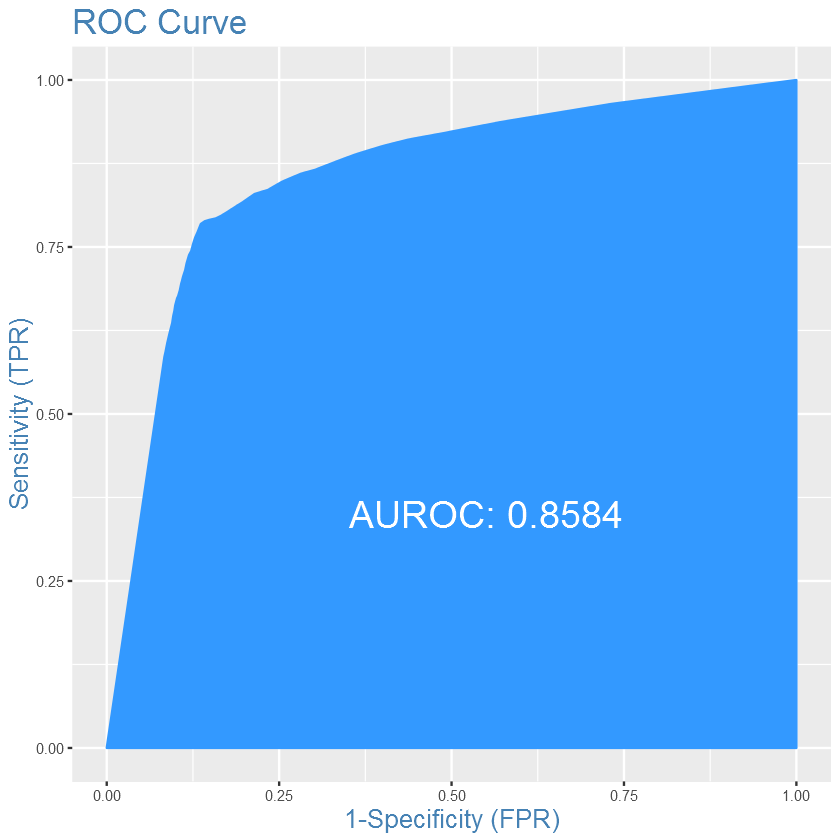

In [282]:
library(InformationValue)
predicted <- predict(fit, da1, type="response")  # predicted scores
#predicted
plotROC(da1, predicted)

In [283]:
sensitivity(da1$Class, predicted, threshold = 0.5)

specificity(da1$Class, predicted, threshold = 0.5)


confusionMatrix(da1$Class, predicted > 0.5)

[1] 0.7378049

[1] 0.9837398

,0,1
0,1452,129
1,24,363


In [284]:
confusionMatrix(da1$Class, predicted > 0.6)

,0,1
0,1461,150
1,15,342


In [285]:
data <- read.csv("D:\\projectR\\datafiles\\creditcard.csv", header = TRUE,
                 stringsAsFactors = FALSE,
                 strip.white = TRUE ,
                 sep = ',')
head(data)

Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.3598071,-0.07278117,2.5363467,1.3781552,-0.33832077,0.46238778,0.23959855,0.09869790,0.3637870,...,-0.018306778,0.277837576,-0.11047391,0.06692807,0.1285394,-0.1891148,0.133558377,-0.02105305,149.62,0
0,1.1918571,0.26615071,0.1664801,0.4481541,0.06001765,-0.08236081,-0.07880298,0.08510165,-0.2554251,...,-0.225775248,-0.638671953,0.10128802,-0.33984648,0.1671704,0.1258945,-0.008983099,0.01472417,2.69,0
1,-1.3583541,-1.34016307,1.7732093,0.3797796,-0.50319813,1.80049938,0.79146096,0.24767579,-1.5146543,...,0.247998153,0.771679402,0.90941226,-0.68928096,-0.3276418,-0.1390966,-0.055352794,-0.05975184,378.66,0
1,-0.9662717,-0.18522601,1.7929933,-0.8632913,-0.01030888,1.24720317,0.23760894,0.37743587,-1.3870241,...,-0.108300452,0.005273597,-0.19032052,-1.17557533,0.6473760,-0.2219288,0.062722849,0.06145763,123.50,0
2,-1.1582331,0.87773675,1.5487178,0.4030339,-0.40719338,0.09592146,0.59294075,-0.27053268,0.8177393,...,-0.009430697,0.798278495,-0.13745808,0.14126698,-0.2060096,0.5022922,0.219422230,0.21515315,69.99,0
2,-0.4259659,0.96052304,1.1411093,-0.1682521,0.42098688,-0.02972755,0.47620095,0.26031433,-0.5686714,...,-0.208253515,-0.559824796,-0.02639767,-0.37142658,-0.2327938,0.1059148,0.253844225,0.08108026,3.67,0


In [286]:
data <- data[c(12,31)]

In [287]:
library(InformationValue)
predicted <- predict(fit, data, type="response")

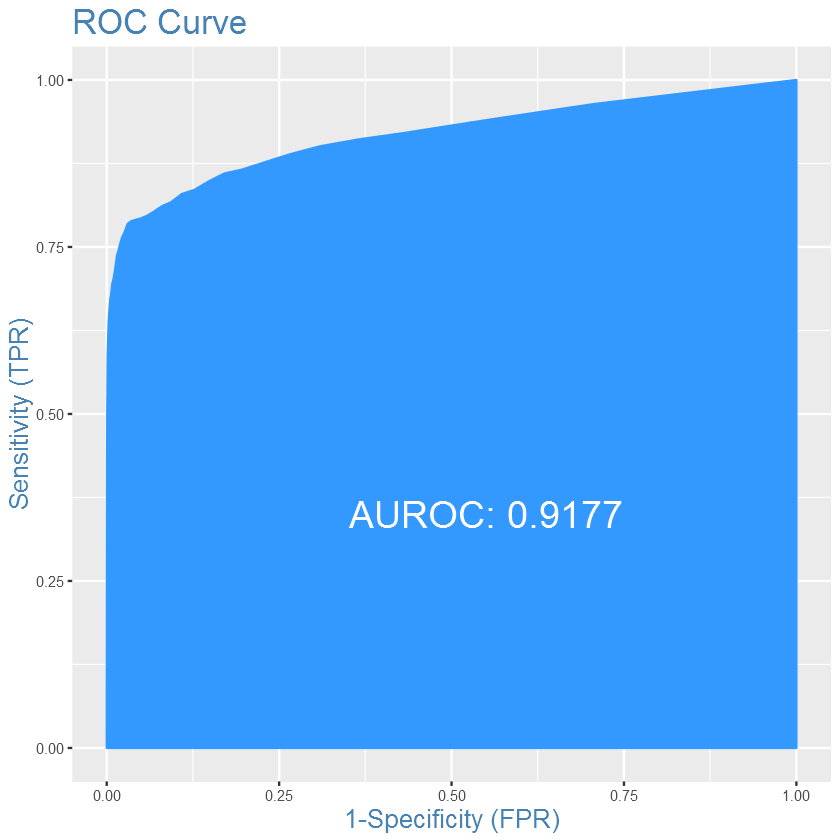

In [288]:
plotROC(data, predicted)

In [289]:
confusionMatrix(data$Class, predicted > 0.5)

,0,1
0,280218,129
1,4097,363


In [297]:
sensitivity(data$Class, predicted, threshold = 0.30)

specificity(data$Class, predicted, threshold = 0.30)

[1] 0.8028455

[1] 0.932209